# Merge and read csv_files

In [1]:
import pandas as pd
import glob
import os

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Keep only rows where Experiment == "SR"
df = df[df["Experiment"] == "SR_ladida"]

# Show the combined DataFrame
print(df.head())

      Name Experiment  Trial                       Sequence       Recall
140  julie  SR_ladida      1  c l b x g q u t f i e m r o j      c l b x
141  julie  SR_ladida      2  t q h k x m u b z f o j y v c      t h q d
142  julie  SR_ladida      3  l r d b u v e a k y c g q o i      l b r d
143  julie  SR_ladida      4  f y p e x s o j r g z v q c b  f y p e x s
144  julie  SR_ladida      5  s c k v a j x h d u r y n f l      s c k v


In [2]:
df["points"] = 0   # initialize column
df["fails"] = [[] for _ in range(len(df))]  # initialize fails as empty lists

for idx, row in df.iterrows():
    seq = row["Sequence"].split()
    rec = row["Recall"].split()
    
    points = 0
    fails = []
    mistake_found = False
    
    for s, r in zip(seq, rec):
        if not mistake_found and s == r:
            points += 1
        elif s != r:
            fails.append((s, r))
            mistake_found = True  # lock the points counter
    
    # save results back into df
    df.at[idx, "points"] = points
    df.at[idx, "fails"] = fails

df.head(10)

,Name,Experiment,Trial,Sequence,Recall,points,fails
140,julie,SR_ladida,1,c l b x g q u t f i e m r o j,c l b x,4,[]
141,julie,SR_ladida,2,t q h k x m u b z f o j y v c,t h q d,1,"[(q, h), (h, q), (k, d)]"
142,julie,SR_ladida,3,l r d b u v e a k y c g q o i,l b r d,1,"[(r, b), (d, r), (b, d)]"
143,julie,SR_ladida,4,f y p e x s o j r g z v q c b,f y p e x s,6,[]
144,julie,SR_ladida,5,s c k v a j x h d u r y n f l,s c k v,4,[]
145,julie,SR_ladida,6,t u q s a p l d v f i n c h k,t u q s a p,6,[]
146,julie,SR_ladida,7,x c p a y d b t j u q z g f h,x c a p y,2,"[(p, a), (a, p)]"
147,julie,SR_ladida,8,b a q k d h s m j z x u e n i,b a q k d h,6,[]
148,julie,SR_ladida,9,n b x p q o l j c a z v k h r,n x p q,1,"[(b, x), (x, p), (p, q)]"
149,julie,SR_ladida,10,m x s p d u t q z i g l f b h,m x p s d,2,"[(s, p), (p, s)]"


# Confusion matrix

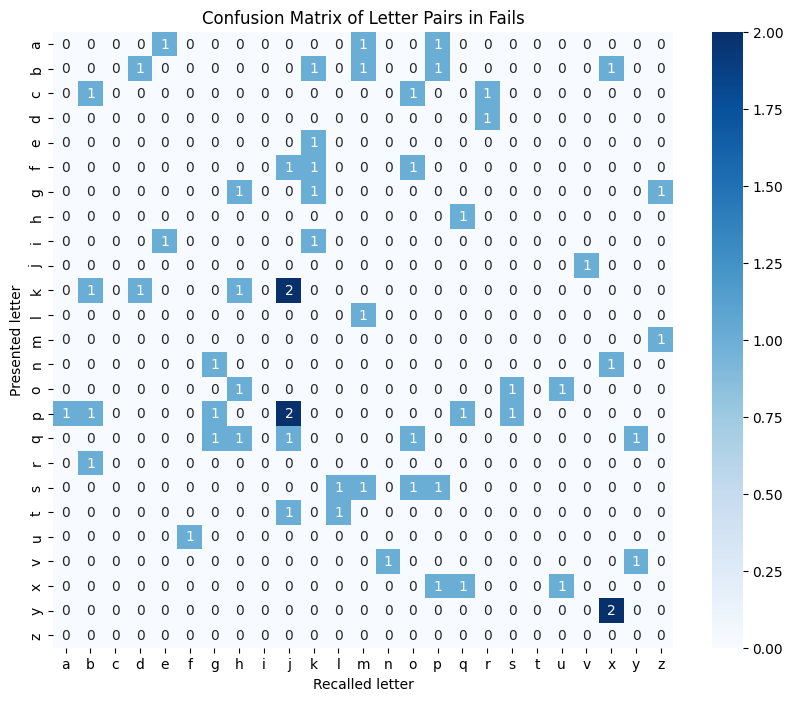

In [3]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt

# Flatten all (s, r) pairs in fails column
all_fails = [pair for sublist in df["fails"] for pair in sublist]

# Count occurrences of each (s, r) pair
fail_counts = Counter(all_fails)

# Get sorted unique letters for axis labels
letters = sorted(set([s for s, _ in all_fails] + [r for _, r in all_fails]))

# Create confusion matrix DataFrame
conf_matrix = pd.DataFrame(0, index=letters, columns=letters)
for (s, r), count in fail_counts.items():
    conf_matrix.loc[s, r] = count

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Recalled letter")
plt.ylabel("Presented letter")
plt.title("Confusion Matrix of Letter Pairs in Fails")
plt.show()